# ClientCo use cases 

## 1. Imports

In [2]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
from tqdm import tqdm
from time import time

In [2]:
sns.set(rc={'figure.figsize':(16,9)})

## 2. Data Loading

In [3]:
df1 = pd.read_csv('dataset_sales_2.csv', sep = ';')

In [4]:
df1.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


In [5]:
#Converting date from string to datetime
df1['date_order'] = df1['date_order'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [6]:
#Creating a copy where we filtered out negative orders
df2 = df1[df1['sales_net'] > 0].copy()

## 3. Basic Data Exploration

In [6]:
#Checking missing values
missing_df = df1.isna()
missing_df = np.round(100 * missing_df.sum()/len(df1), 2)
missing_df

date_order       0.0
date_invoice     0.0
product_id       0.0
client_id        0.0
sales_net        0.0
quantity         0.0
order_channel    0.0
branch_id        0.0
dtype: float64

In [49]:
#Sales-net and quantity
df1[['sales_net', 'quantity']].describe()

,sales_net,quantity
count,6.331932e+07,6.331932e+07
mean,1.479416e+02,9.215658e+01
std,8.646548e+02,8.674801e+02
min,-1.738817e+06,3.000000e+00
25%,1.414653e+01,3.000000e+00
50%,4.424280e+01,5.000000e+00
75%,1.314680e+02,2.100000e+01
max,1.740456e+06,1.980010e+05


In [ ]:
sns.histplot(data=df1, x="sales_net")

In [57]:
#Nb of channels
df1['order_channel'].nunique()

5

In [59]:
#Nb of branches
df1['branch_id'].nunique()

582

In [61]:
#Nb of products
df1['product_id'].nunique()

607418

In [62]:
#Nb of clients
['client_id'].nunique()

170589

In [63]:
#Nb of branches 
df1.groupby(['order_channel']).agg({'branch_id' : 'nunique'})

,branch_id
order_channel,
at the store,555
by phone,572
during the visit of a sales rep,142
online,510
other,478


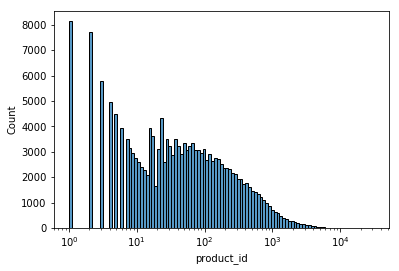

In [66]:
sns.histplot(data=df_gby, x="product_id", log_scale = True)

In [81]:
#Time series 
df_monthly = df1.copy()
df_monthly['year_month'] = df_monthly['date_order'].apply(lambda x : str(x.year) + '_' + str(x.month))

In [82]:
df_monthly_gby = df_monthly.groupby(['year_month']).agg({'sales_net' : 'sum', 'quantity' : 'sum', 'client_id' : 'nunique', 'product_id' : 'nunique'}).reset_index()

In [85]:
df_monthly_gby

,year_month,sales_net,quantity,client_id,product_id
0,2017_10,4.188312e+08,302317615,76486,113890
1,2017_11,4.025142e+08,250233470,74598,113154
2,2017_12,3.721120e+08,233447497,71944,108477
3,2017_9,8.862928e+07,55969046,39862,53279
4,2018_1,3.882355e+08,243431506,72215,110508
5,2018_10,4.408281e+08,286163151,76151,116149
6,2018_11,4.031602e+08,252437569,73367,113221
7,2018_12,4.071132e+08,278901278,72572,112997
8,2018_2,3.697512e+08,232455180,70199,107465
9,2018_3,4.317772e+08,271642534,73580,116247


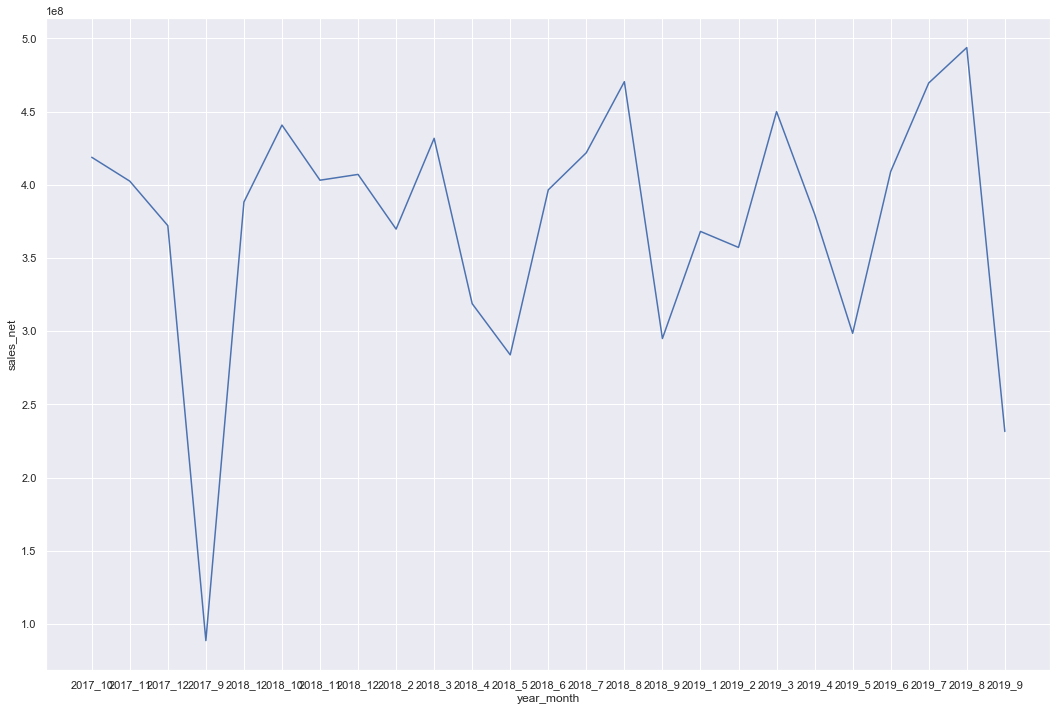

In [113]:
sns.set(rc={'figure.figsize':(18,12)})
sns.lineplot(data = df_monthly_gby, x = 'year_month', y = 'sales_net')

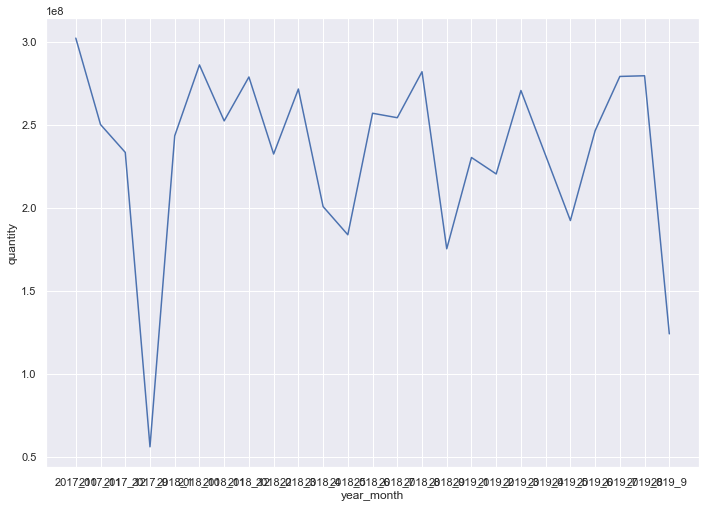

In [89]:
sns.lineplot(data = df_monthly_gby, x = 'year_month', y = 'quantity')

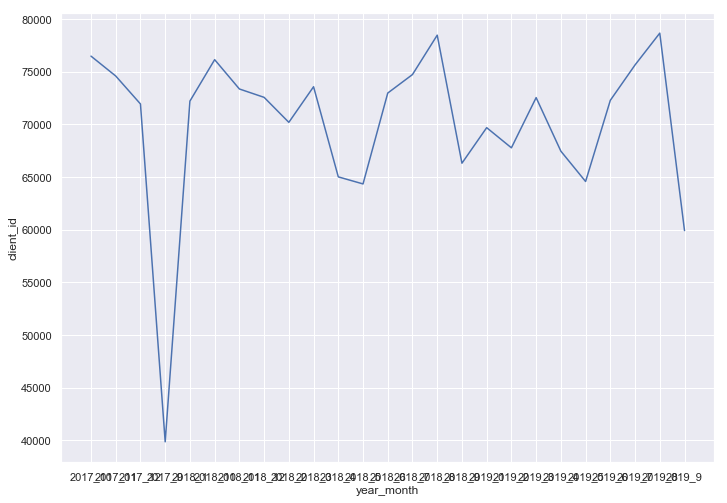

In [90]:
sns.lineplot(data = df_monthly_gby, x = 'year_month', y = 'client_id')

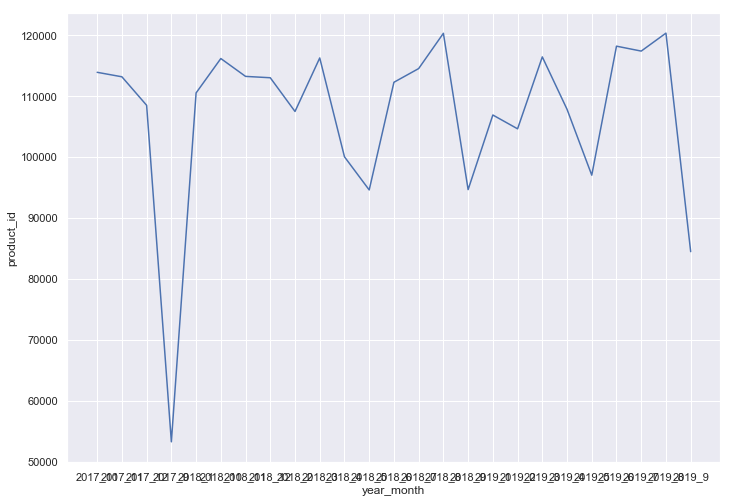

In [91]:
sns.lineplot(data = df_monthly_gby, x = 'year_month', y = 'product_id')

In [92]:
df_client = df1.copy()
df_client['date_order_2'] = df_client['date_order']

In [94]:
df_client = df_client.groupby(['client_id']).agg({'date_order' : 'min', 'date_order_2' : 'max', 'product_id' : 'count', 'sales_net' : 'sum'})

In [99]:
df_client['delta'] = df_client['date_order_2'] - df_client['date_order']
df_client['delta'] = df_client['delta'].apply(lambda x : x.days)

In [100]:
df_client.head()

,date_order,date_order_2,product_id,sales_net,delta
client_id,,,,,
6,2017-10-27,2019-08-13,40,5.882233e+03,655
7,2018-07-16,2018-12-24,15,1.190777e+03,161
14,2017-09-25,2019-09-20,12762,3.103187e+06,725
18,2017-09-26,2019-09-12,2224,2.194882e+05,716
25,2018-10-10,2018-10-10,4,3.745861e+02,0


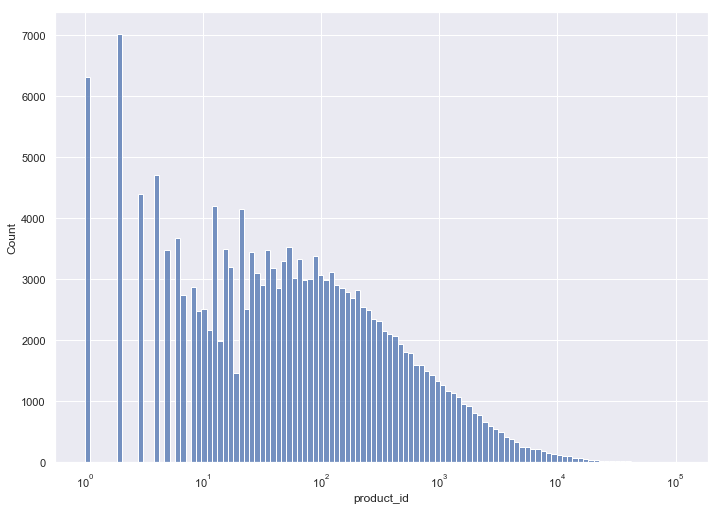

In [106]:
sns.histplot(data=df_client, x="product_id", log_scale = True)

In [ ]:
#Churn viz

In [111]:
df_client['first_month'] = df_client['date_order'].apply(lambda x : str(x.month) + '_' + str(x.year))
df_client['last_month'] = df_client['date_order_2'].apply(lambda x : str(x.month) + '_' + str(x.year))

In [124]:
df_client_filtered = df_client[df_client['date_order'] > datetime(2018, 4, 1)]
df_client_filtered = df_client_filtered[df_client_filtered['date_order_2'] < datetime(2019, 4, 30)]

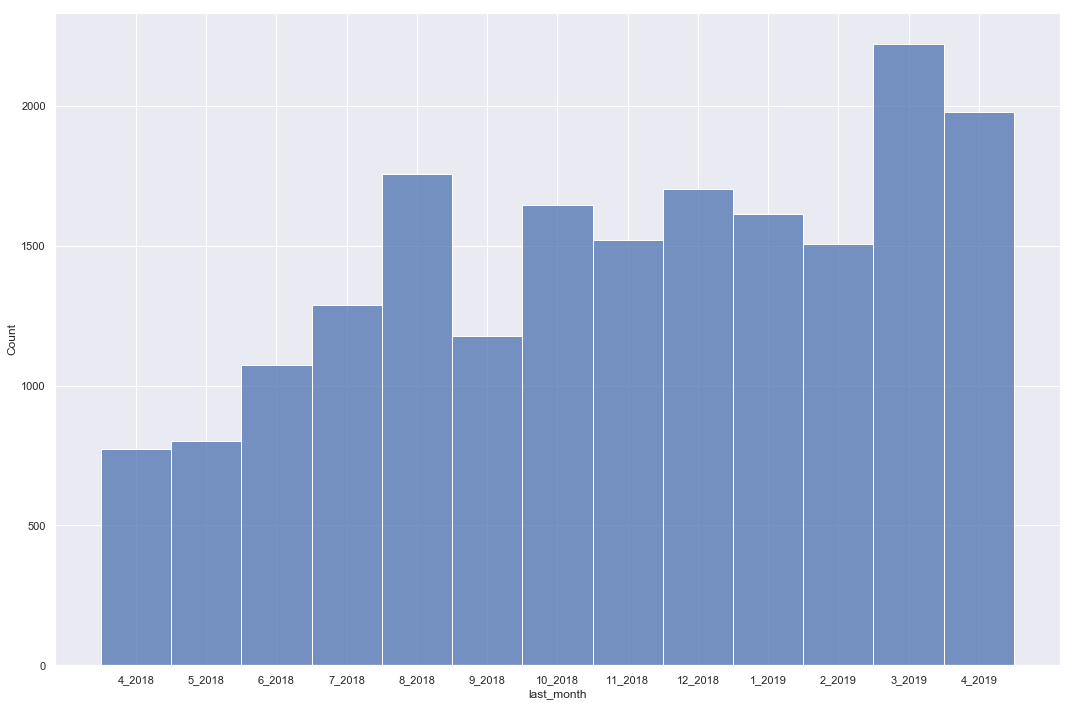

In [125]:
sns.histplot(data = df_client_filtered.sort_values(by = 'date_order_2'), x = 'last_month')

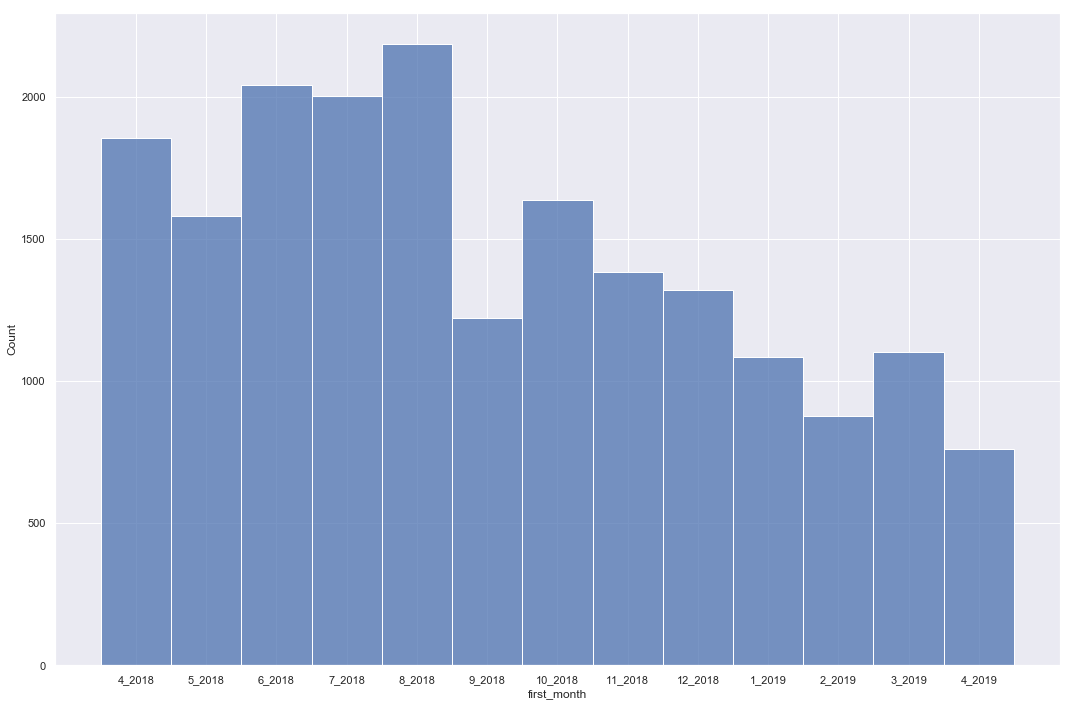

In [126]:
sns.histplot(data = df_client_filtered.sort_values(by = 'date_order'), x = 'first_month')

In [127]:
df_client_filtered.groupby(['first_month']).agg()

,date_order,date_order_2,product_id,sales_net,delta,first_month,last_month
client_id,,,,,,,
7,2018-07-16,2018-12-24,15,1190.777083,161,7_2018,12_2018
25,2018-10-10,2018-10-10,4,374.586096,0,10_2018,10_2018
55,2018-07-03,2018-10-11,9,4098.117484,100,7_2018,10_2018
60,2019-03-15,2019-03-19,7,0.000000,4,3_2019,3_2019
76,2018-10-23,2019-04-01,9,1068.572640,160,10_2018,4_2019


## 4. Channel analysis by trimester

In [131]:
trimesters = {}
for k in range(1, 13):
    trimesters[k] = ((k-1)//3)+1

In [159]:
df_online = df1[df1['order_channel'] == 'online'].copy()
df_store = df1[df1['order_channel'] == 'at the store'].copy()
df_visit = df1[df1['order_channel'] == 'during the visit of a sales rep'].copy()
df_phone = df1[df1['order_channel'] == 'by phone'].copy()

In [160]:
df_online['trimester'] = df_online['date_order'].apply(lambda x : str(x.year) + '_' + str(trimesters[x.month]))

In [166]:
df_store['trimester'] = df_store['date_order'].apply(lambda x : str(x.year) + '_' + str(trimesters[x.month]))
df_visit['trimester'] = df_visit['date_order'].apply(lambda x : str(x.year) + '_' + str(trimesters[x.month]))
df_phone['trimester'] = df_phone['date_order'].apply(lambda x : str(x.year) + '_' + str(trimesters[x.month]))

In [161]:
df_online_trim = df_online.groupby(['trimester']).agg({'sales_net' : 'sum'}).reset_index()

In [167]:
df_store_trim = df_store.groupby(['trimester']).agg({'sales_net' : 'sum'}).reset_index()
df_visit_trim = df_visit.groupby(['trimester']).agg({'sales_net' : 'sum'}).reset_index()
df_phone_trim = df_phone.groupby(['trimester']).agg({'sales_net' : 'sum'}).reset_index()

In [168]:
df_online_trim['canal'] = 'online'
df_store_trim['canal'] = 'store'
df_visit_trim['canal'] = 'visit'
df_phone_trim['canal'] = 'phone'

In [182]:
df_all_trim = df_online_trim.append(df_store_trim).append(df_visit_trim).append(df_phone_trim)
df_all_trim = df_all_trim[df_all_trim['trimester'] != '2017_3']

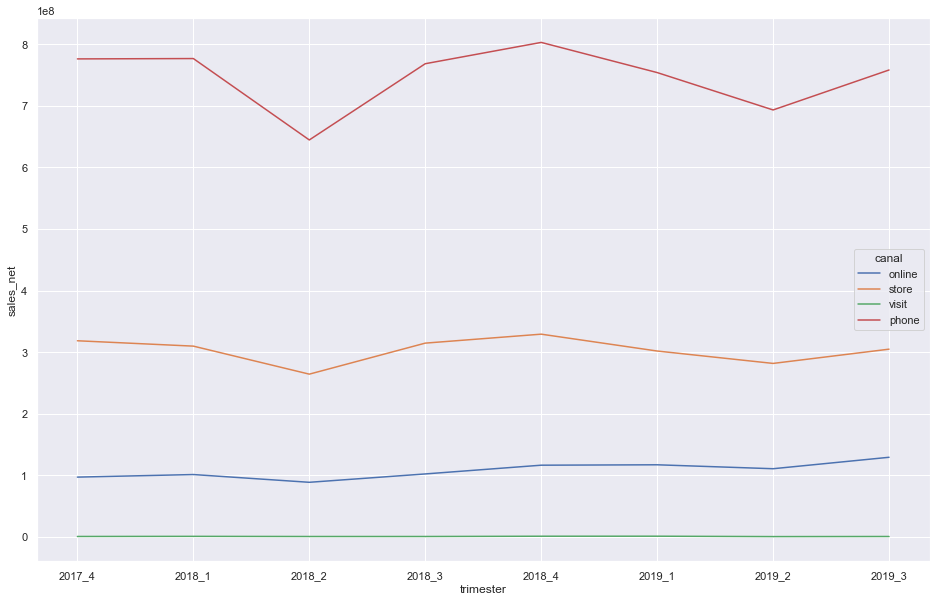

In [183]:
sns.lineplot(data = df_all_trim, x = 'trimester', y = 'sales_net', hue = 'canal')

### 5. Price analysis

In [236]:
df1.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


In [277]:
df_product1 = df2[df2['product_id'] == 2376333].copy()

In [278]:
df_product1['price'] = df_product1['sales_net'] / df_product1['quantity']

In [279]:
df_product1 = df_product1[df_product1['date_order'].apply(lambda x : x.year) < 2018]

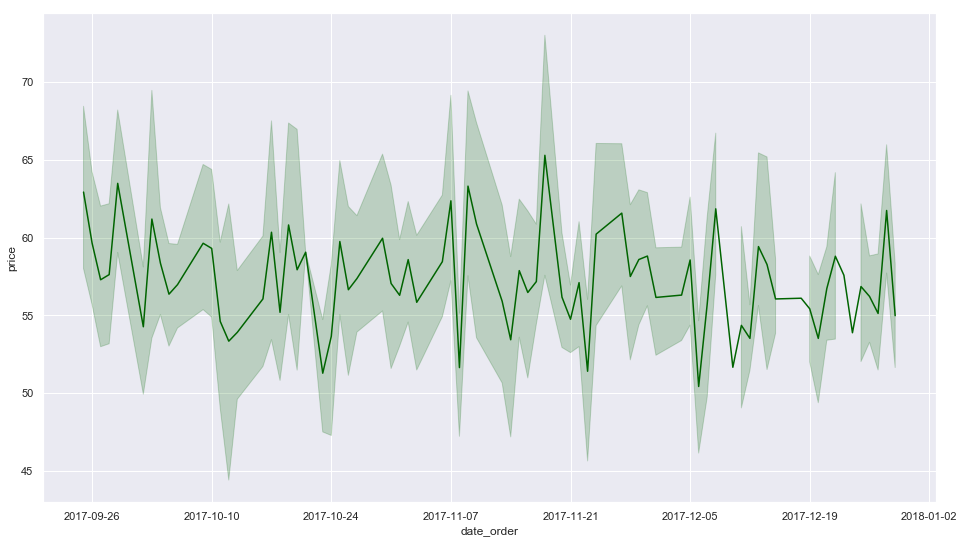

In [287]:
sns.lineplot(data = df_product1[(df_product1.price > 10)], x = 'date_order', y = 'price', color = 'darkgreen')

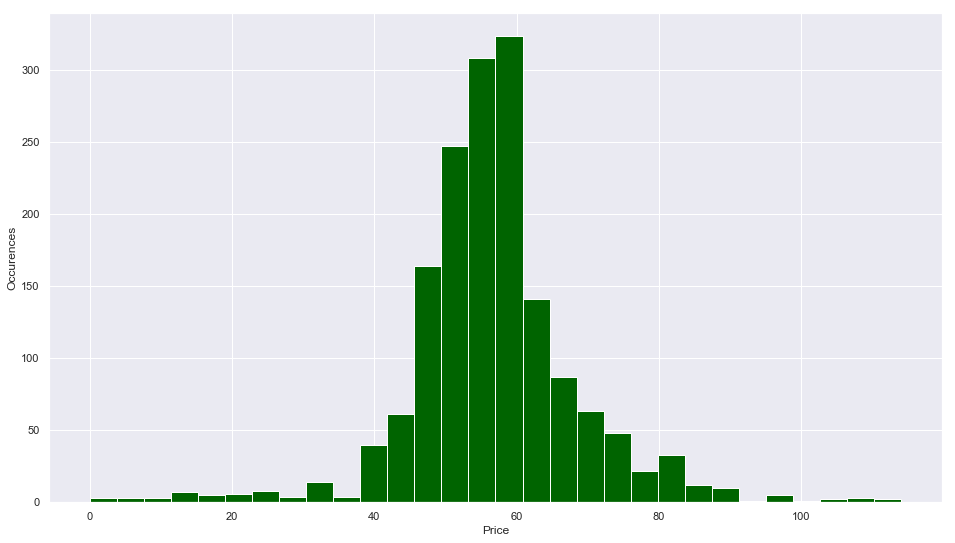

In [286]:
plt.hist(df_product1['price'], bins = 30, color = 'darkgreen')
plt.xlabel('Price')
plt.ylabel('Occurences')
plt.show()

In [ ]:
df_client = df1.copy()
df_client['date_order_max'] = df_client['date_order']
df_client['nb_channels'] = df_client['order_channel']
df_client = df_client.groupby(['client_id']).agg({'date_order' : 'min', 'date_order_max' : 'max', 'date_invoice' : 'count', 'product_id' : 'nunique', 'sales_net' : 'sum', 'nb_channels' : 'nunique', 'order_channel' :  lambda x: stats.mode(x), 'branch_id' : 'nunique'})

df_client.rename(columns = {'date_order' : 'date_order_min',
                           'date_invoice' : 'nb_orders',
                           'product_id' : 'nb_products',
                           'order_channel' : 'most_common_channel',
                           'branch_id' : 'nb_branches'}, inplace = True)

df_client['delta'] = df_client['date_order_max'] - df_client['date_order_min']
df_client['delta'] = df_client['delta'].apply(lambda x : x.days)
df_client['freq'] = df_client['nb_orders'] / (df_client['delta']+1)
df_client['avg_sales'] = df_client['sales_net'] / df_client['nb_orders']

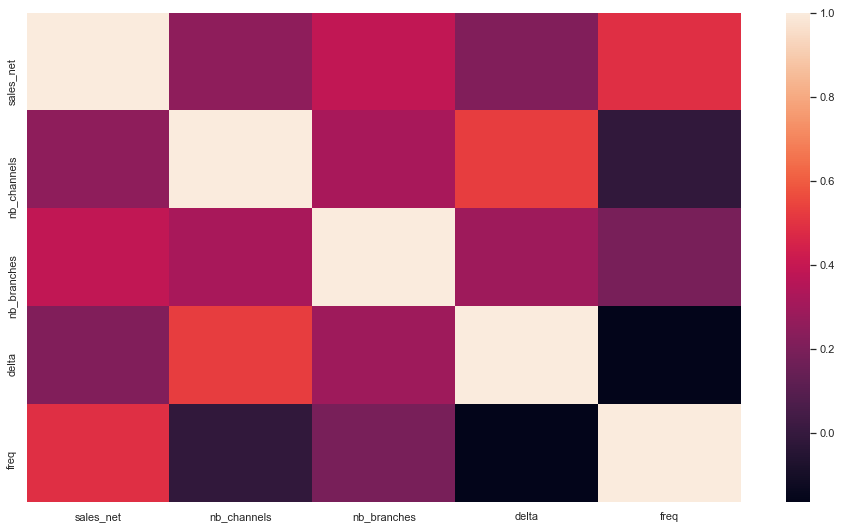

In [128]:
sns.heatmap(data = df_client[['sales_net', 'nb_channels', 'nb_branches', 'delta', 'freq']].corr())

In [235]:
#Différence clients
df_client.describe()

,nb_orders,nb_products,sales_net,nb_channels,nb_branches,delta,freq,avg_sales
count,170589.000000,170589.000000,1.705890e+05,170589.000000,170589.000000,170589.000000,170589.000000,170589.000000
mean,371.180522,155.689716,5.491304e+04,1.839656,2.508040,428.901576,1.199386,213.829923
std,1430.183785,396.214366,2.438333e+05,0.716017,4.708905,273.705494,3.682848,1338.526500
min,1.000000,1.000000,-9.239541e+02,1.000000,1.000000,0.000000,0.002793,-90.160000
25%,12.000000,9.000000,1.271890e+03,1.000000,1.000000,154.000000,0.080838,68.356544
50%,50.000000,35.000000,6.163601e+03,2.000000,1.000000,523.000000,0.258065,110.459957
75%,214.000000,134.000000,2.933579e+04,2.000000,3.000000,690.000000,1.000000,189.835619
max,105636.000000,30812.000000,2.755879e+07,5.000000,537.000000,729.000000,396.000000,248660.940568


In [1]:
# Répartitioon du mix produit

In [311]:
df_product = df2.groupby(['product_id']).agg({'sales_net' : 'sum'}).reset_index()

In [312]:
total_sales = df_product.sales_net.sum()

In [314]:
df_product = df_product.sort_values(by = 'sales_net', ascending = False).reset_index().reset_index()

In [325]:
df_product.head()

,level_0,index,product_id,sales_net
0,0,501253,2681878,4.072189e+07
1,1,86334,463156,2.539948e+07
2,2,475111,2542409,2.415942e+07
3,3,233910,1253061,2.389214e+07
4,4,247463,1325810,2.010442e+07


In [324]:
for k in range(1,21) :
    n = int(len(df_product)*(k/20))
    prop = df_product.head(n).sales_net.sum() / total_sales
    print(5 * k, "% des produits sont à l'origine de", round(100 * prop, 1), "% du chiffre d'affaire")

5 % des produits sont à l'origine de 83.2 % du chiffre d'affaire
10 % des produits sont à l'origine de 90.4 % du chiffre d'affaire
15 % des produits sont à l'origine de 93.6 % du chiffre d'affaire
20 % des produits sont à l'origine de 95.4 % du chiffre d'affaire
25 % des produits sont à l'origine de 96.6 % du chiffre d'affaire
30 % des produits sont à l'origine de 97.4 % du chiffre d'affaire
35 % des produits sont à l'origine de 98.0 % du chiffre d'affaire
40 % des produits sont à l'origine de 98.5 % du chiffre d'affaire
45 % des produits sont à l'origine de 98.9 % du chiffre d'affaire
50 % des produits sont à l'origine de 99.1 % du chiffre d'affaire
55 % des produits sont à l'origine de 99.3 % du chiffre d'affaire
60 % des produits sont à l'origine de 99.5 % du chiffre d'affaire
65 % des produits sont à l'origine de 99.7 % du chiffre d'affaire
70 % des produits sont à l'origine de 99.8 % du chiffre d'affaire
75 % des produits sont à l'origine de 99.8 % du chiffre d'affaire
80 % des pr

In [326]:
#Churn viz

In [328]:
df_client.head()

,date_order_min,date_order_max,nb_orders,nb_products,sales_net,nb_channels,most_common_channel,nb_branches,delta,freq,avg_sales
client_id,,,,,,,,,,,
6,2017-10-27,2019-08-13,40,37,5.882233e+03,2,by phone,1,655,0.060976,147.055825
7,2018-07-16,2018-12-24,15,10,1.190777e+03,1,at the store,1,161,0.092593,79.385139
14,2017-09-25,2019-09-20,12762,4898,3.103187e+06,3,by phone,9,725,17.578512,243.158351
18,2017-09-26,2019-09-12,2224,786,2.194882e+05,3,at the store,2,716,3.101813,98.690724
25,2018-10-10,2018-10-10,4,4,3.745861e+02,1,at the store,1,0,4.000000,93.646524


In [330]:
df_churn = df_client.reset_index().groupby(['date_order_max']).agg({'client_id' : 'count'}).reset_index()

In [335]:
df_churn['month_year'] = df_churn.date_order_max.apply(lambda x : datetime(x.year, x.month, 1))

In [339]:
df_churn_month = df_churn.groupby('month_year').agg({'client_id' : 'sum'}).reset_index()

In [346]:
df_churn_stable = df_churn_month[df_churn_month.month_year < datetime(2019, 2, 1)]
df_churn_stable = df_churn_stable[df_churn_stable.month_year > datetime(2017, 9, 1)]

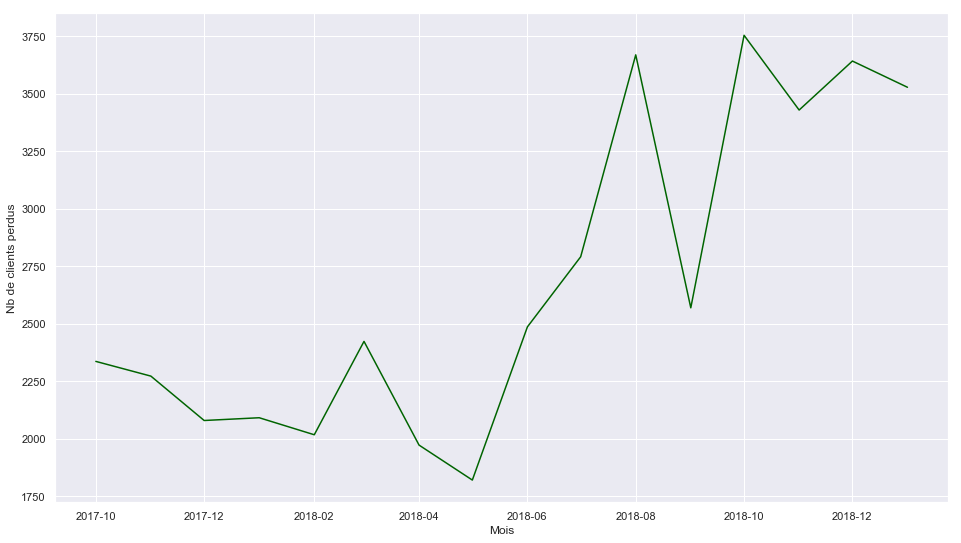

In [383]:
plt.plot(df_churn_stable.month_year, df_churn_stable.client_id, color = 'darkgreen')
plt.xlabel('Mois')
plt.ylabel('Nb de clients perdus')
plt.show()

In [377]:
df_client_stable = df_client[df_client.date_order_min < datetime(2019,3,22)]
df_client_stable = df_client_stable[df_client_stable.date_order_max > datetime(2018,3,22)]

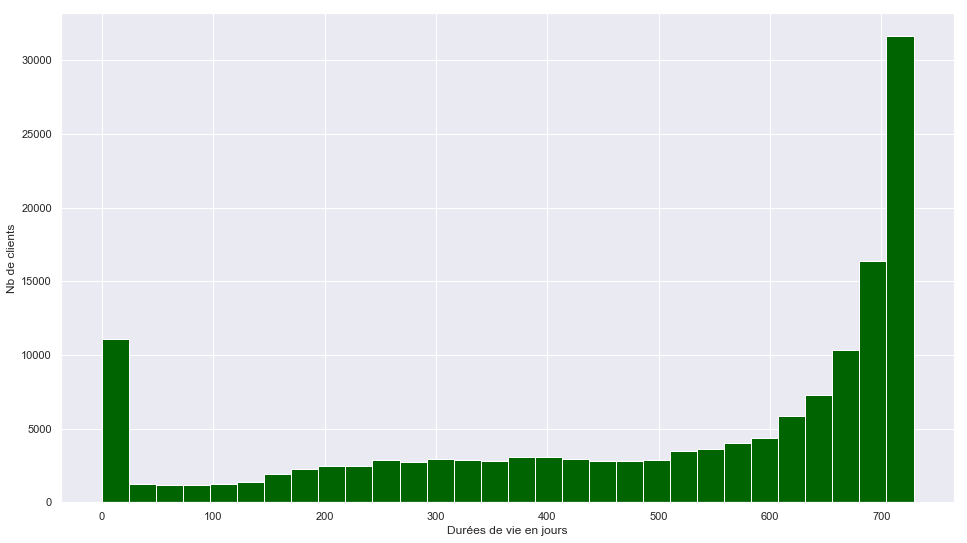

In [385]:
plt.hist(df_client_stable.delta, bins = 30, color = 'darkgreen')
plt.xlabel('Durées de vie en jours')
plt.ylabel('Nb de clients')
plt.show()

In [386]:
df_client_stable.delta.mean()

498.31111493817383